## インポート

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('train.csv', engine='python', encoding='s-jis')
df

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
...,...,...,...,...,...,...,...,...,...,...,...
845,25,Male,0.767450,0.186467,215.656126,13.963269,20.160997,6.824975,3.622443,1.297731,0
846,57,Male,0.867946,0.156997,213.810275,14.564305,20.122535,7.509893,3.619143,1.296843,0
847,50,Male,0.826785,0.138898,230.340081,40.495102,49.620857,7.529840,3.724408,0.987033,1
848,32,Female,0.761972,0.137969,214.170393,18.048321,54.447774,5.944855,3.150978,1.220787,0


## データを見る

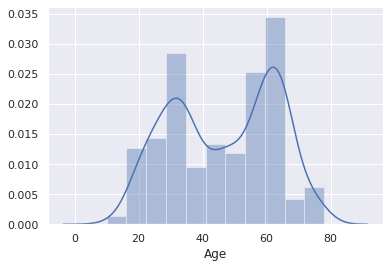

In [2]:
# ヒストグラム
sns.set()
sns.distplot(df['Age'])

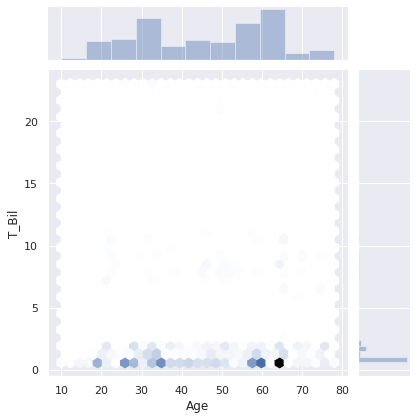

In [3]:
# 2変数の分布
sns.jointplot(x='Age', y='T_Bil', data=df, kind='hex')

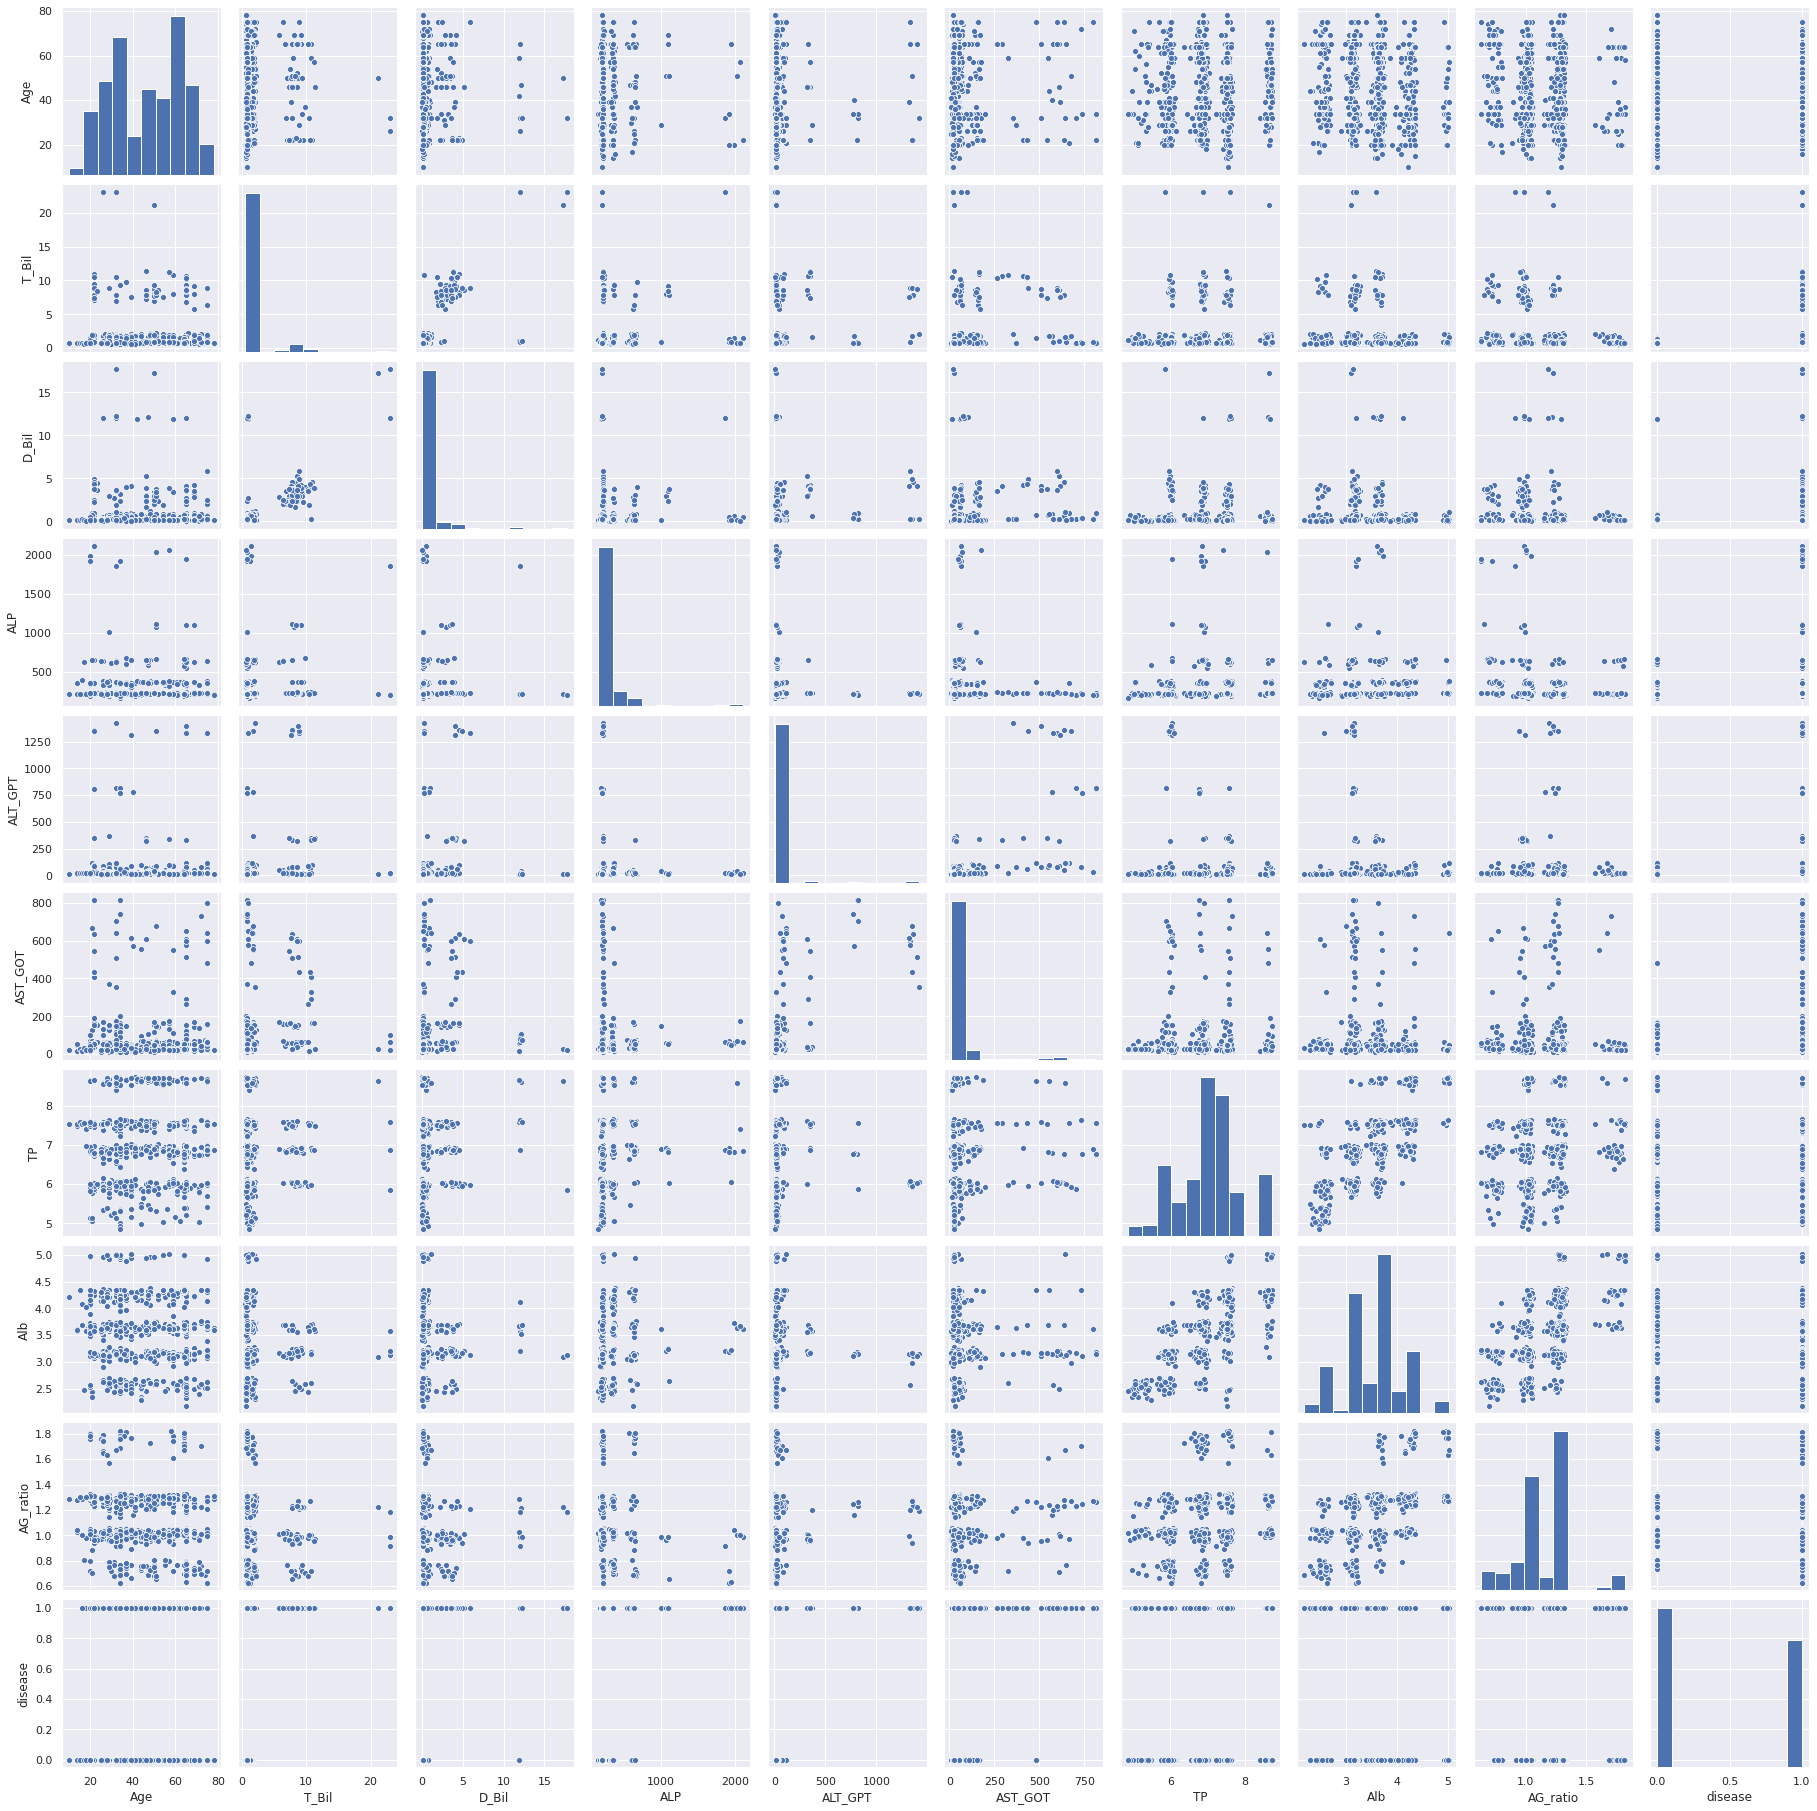

In [4]:
# 複数のカラムの分布を一発で表示
sns.pairplot(df)

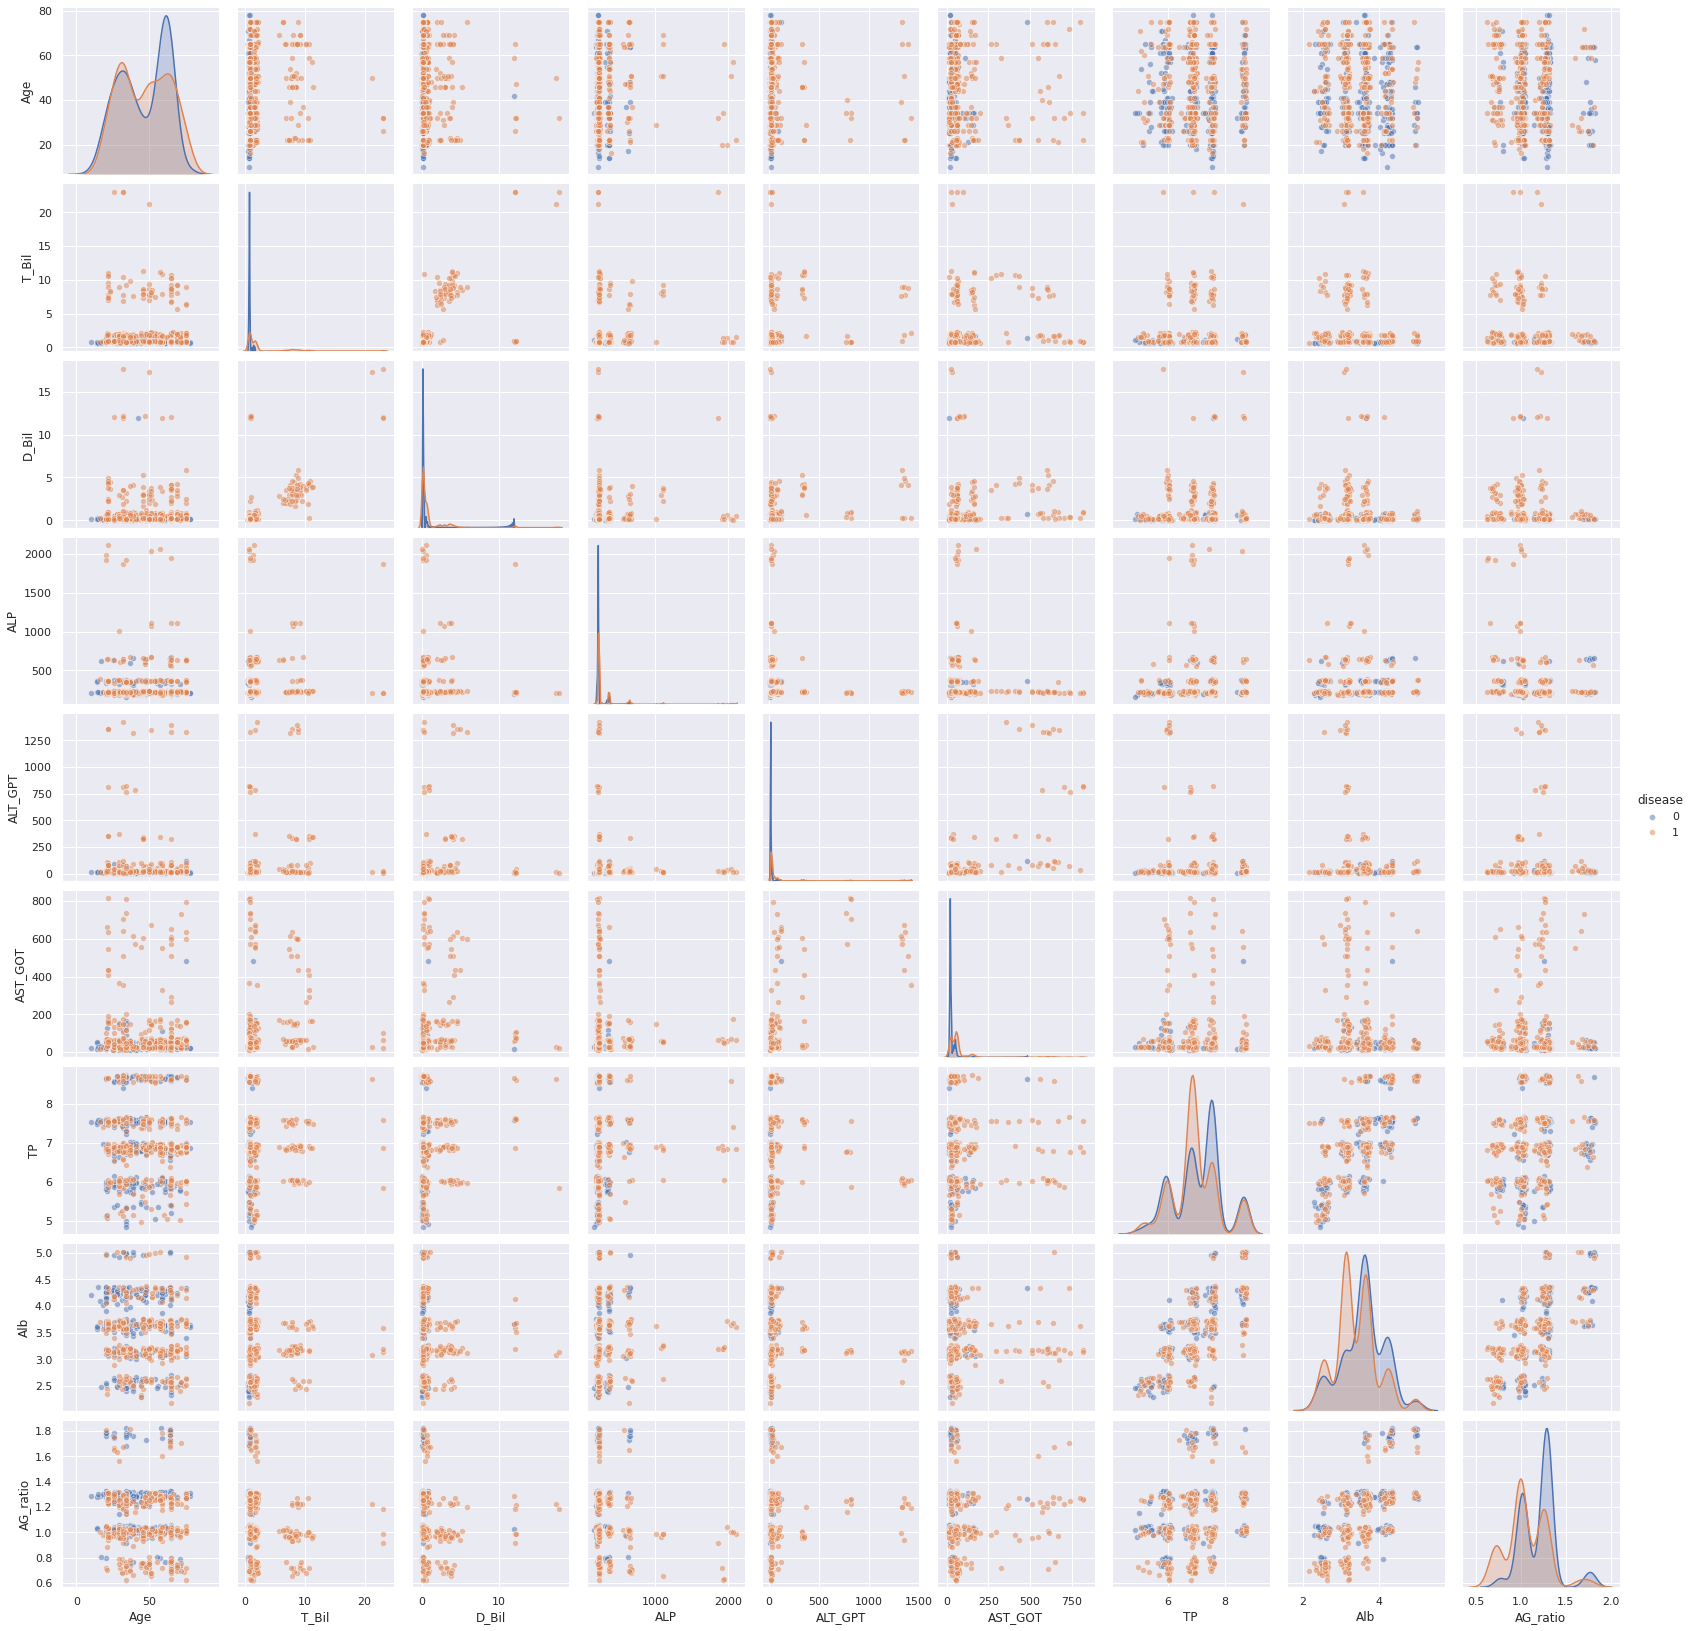

In [5]:
# 複数のカラムの分布を一発で表示
sns.pairplot(df, hue='disease', kind='scatter', plot_kws={'alpha':0.5})

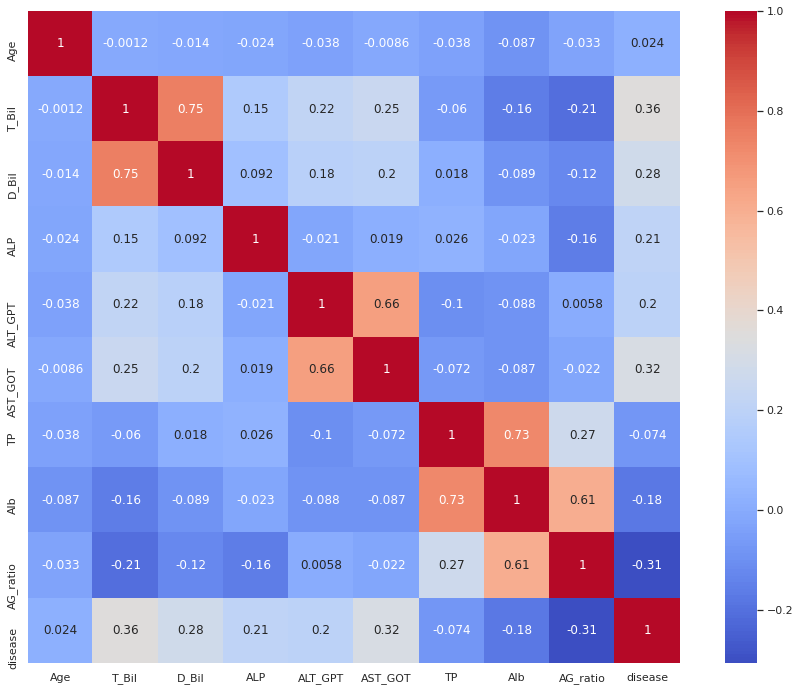

In [6]:
# ヒートマップを表示
corr = df.corr()
plt.figure(figsize=(16, 12)) 
cmap = sns.color_palette("coolwarm",200)
sns.heatmap(corr,square=True,annot=True,cmap=cmap)

## 前処理

In [8]:
# genderでMaleを0,Femaleを1にする
for i in range(len(df)):
    if df['Gender'][i] == 'Male':
        df['Gender'][i] = 0
    else:
        df['Gender'][i] = 1
df

<ipython-input-8-d6285de5697a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = 0
<ipython-input-8-d6285de5697a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = 1


,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,0,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,0,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,0,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,1,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
...,...,...,...,...,...,...,...,...,...,...,...
845,25,0,0.767450,0.186467,215.656126,13.963269,20.160997,6.824975,3.622443,1.297731,0
846,57,0,0.867946,0.156997,213.810275,14.564305,20.122535,7.509893,3.619143,1.296843,0
847,50,0,0.826785,0.138898,230.340081,40.495102,49.620857,7.529840,3.724408,0.987033,1
848,32,1,0.761972,0.137969,214.170393,18.048321,54.447774,5.944855,3.150978,1.220787,0


## 説明変数と目的変数、trainとtestに分割する

In [16]:
from sklearn.model_selection import train_test_split

# 説明変数と目的変数に分割
X = df.drop('disease', axis=1)
y = df['disease']

# train、testに分割
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=0)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (637, 10)
y_train shape: (637,)
X_test shape: (213, 10)
y_test shape: (213,)


## Kー最近傍法

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
y_pred = knn.predict(X_test)
print('Test set score: {}'.format(knn.score(X_test, y_test)))

Test set score: 0.8450704225352113


## RandomForest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Random Forest 判断の可視化
from sklearn import tree
# import pydotplus as pdp
from IPython.display import Image
rm = RandomForestClassifier(n_estimators=5, random_state=2)
rm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [70]:
print('Accuracy on training set: {}'.format(rm.score(X_train,y_train)))
print('Accuracy in test set: {}'.format(rm.score(X_test, y_test)))

Accuracy on training set: 0.9843014128728415
Accuracy in test set: 0.8732394366197183


In [90]:
params = {
    "max_depth": [2, 4, 6, 8, None],
    "n_estimators": [50,100,200,300,400,500],
    "max_features": range(1, 10),
    "min_samples_split": range(2, 10),
    "min_samples_leaf": range(1, 10)
}

# 結構時間かかります
rscv = RandomizedSearchCV(RandomForestClassifier(), params, cv=2, n_iter=30)
rscv.fit(X_train, y_train)
            
print("Best score: {}".format(rscv.best_score_))
print("Best parameters: {}".format(rscv.best_params_))

Best score: 0.8429693815185032
Best parameters: {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 8}


In [80]:
print('Accuracy on training set: {}'.format(rscv.score(X_train,y_train)))

Accuracy on training set: 0.9136577708006279


In [81]:
print('Accuracy on test set: {}'.format(rscv.score(X_test, y_test)))

Accuracy on test set: 0.8497652582159625


In [84]:
# 最良モデルを取り出す
best_estimator = rscv.best_estimator_

# そのモデルのパラメータを確認
print(best_estimator.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [86]:
# ランキングせず質素に羅列した場合
print(X_train.columns)
print(best_estimator.feature_importances_)

Index(['Age', 'Gender', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP',
       'Alb', 'AG_ratio'],
      dtype='object')
[0.03376995 0.01371615 0.18334943 0.13984918 0.12222064 0.14456268
 0.14943104 0.06193083 0.06088841 0.09028169]


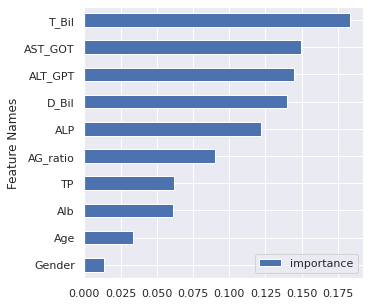

In [88]:
# グラフ可視化用に加工した場合
df_imp = pd.DataFrame(best_estimator.feature_importances_, columns=["importance"])
df_imp["Feature Names"] = X_train.columns
df_imp.set_index("Feature Names", inplace=True)
df_imp.sort_values(by="importance").plot(kind="barh", figsize=(5, 5))
plt.show()

## SVM

In [91]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [94]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.847723704866562
0.8591549295774648


## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8241758241758241
0.8450704225352113


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## NN

In [97]:
# Neural Network 関連
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam

# Neural Network での交差検証用
from keras.wrappers.scikit_learn import KerasClassifier

ModuleNotFoundError: No module named 'keras'

In [98]:
pip3 install keras

SyntaxError: invalid syntax (<ipython-input-98-0b23733f3e06>, line 1)